## Whitening (ZCA, PCA)

https://jermwatt.github.io/control-notes/posts/zca_sphereing/ZCA_Sphereing.html


In [65]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

palette = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52'] #  plotly.colors.qualitative.Plotly
# Matching light colors
# ['#ccd0ff', '#ffd3cc', '#ccfff2', '#e4ccff', ...]

Eigenvalues:
 [-0.23606798  4.23606798]
Eigenvectors:
 [[-0.85065081 -0.52573111]
 [ 0.52573111 -0.85065081]]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: covariance is not positive-semidefinite.
  import sys


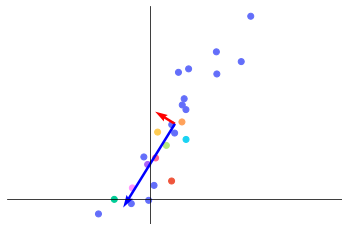

In [66]:
# generate 25 random points sampled from a correlated 2d Gaussian
np.random.seed(0)
n = 25
mean = [1, 3]
cov = [[1,   2], 
       [2,   3]]
x, y = np.random.multivariate_normal(mean, cov, n).T
data = np.vstack((x, y)).T

eigval, eigvec = np.linalg.eig(cov)
print("Eigenvalues:\n", eigval)
print("Eigenvectors:\n", eigvec)

# Normalizing eigenvectors for plotting
for i in range(len(eigval)):
    eigvec[:, i] = eigvec[:, i] / np.linalg.norm(eigvec[:, i]) * np.sqrt(np.abs(eigval[i]))

c = palette + [palette[0]]* (n - len(palette))
plt.scatter(data[:, 0], data[:, 1], c=c)
plt.quiver(mean[0], mean[1], eigvec[0, 0], eigvec[1, 0], color='r', scale=7, label='Principal Component 1')
plt.quiver(mean[0], mean[1], eigvec[0, 1], eigvec[1, 1], color='b', scale=7, label='Principal Component 2')
plt.axis('equal')
# remove box and axes
plt.axis('off')
# add spines
plt.axhline(0, color='black',linewidth=0.75)
plt.axvline(0, color='black',linewidth=0.75)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: covariance is not positive-semidefinite.
  import sys


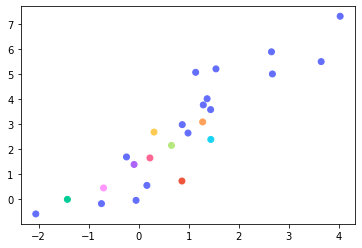

In [67]:
# generate 25 random points sampled from a correlated 2d Gaussian
np.random.seed(0)
n = 25
mean = [1, 3]
cov = [[1,   2], 
       [2,   3]]
x, y = np.random.multivariate_normal(mean, cov, n).T
data = np.vstack((x, y)).T

c = palette + [palette[0]]* (n - len(palette))
plt.scatter(data[:, 0], data[:, 1], c=c)


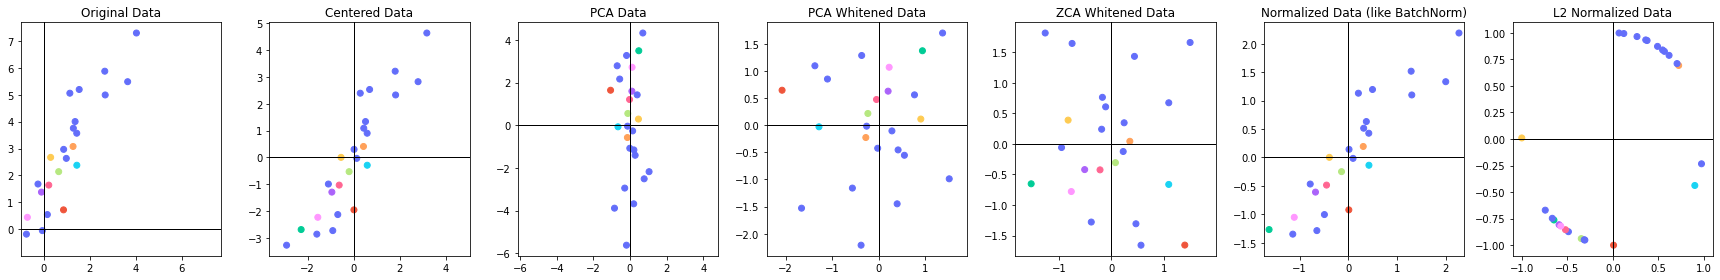

In [68]:
# zero mean the data (Centering)
d_centered = data - np.mean(data, axis=0)
# compute the covariance matrix
cov = np.cov(d_centered.T)
# eigen decomposition
eig_vals, eig_vecs = np.linalg.eig(cov)
# Features in pca space
features = np.dot(d_centered, eig_vecs)
# PCA Whitened data
eps = 1e-5
lmd_t = np.diag((eig_vals+eps)**(-0.5))
w_pca = (lmd_t @ eig_vecs.T @ d_centered.T).T

# ZCA Whitened data
w_zca = (eig_vecs @ lmd_t @ eig_vecs.T @ d_centered.T).T

# normalize the data by its standard deviation
normed = d_centered / np.std(d_centered, axis=0)

# L2 normalize the data
l2_normed = d_centered / np.linalg.norm(d_centered, axis=1, keepdims=True)

# create subplots to plot hte original, centered, pca space, pca whitened data
fig, ax = plt.subplots(1, 7, figsize=(24, 4))
ax[0].scatter(data[:, 0], data[:, 1], c=c)
ax[0].set_title('Original Data')
ax[1].scatter(d_centered[:, 0], d_centered[:, 1], c=c)
ax[1].set_title('Centered Data')
ax[2].scatter(features[:, 0], features[:, 1], c=c)
ax[2].set_title('PCA Data')

ax[3].scatter(w_pca[:, 0], w_pca[:, 1], c=c)
ax[3].set_title('PCA Whitened Data')

ax[4].scatter(w_zca[:, 0], w_zca[:, 1], c=c)
ax[4].set_title('ZCA Whitened Data')

ax[5].scatter(normed[:, 0], normed[:, 1], c=c)
ax[5].set_title('Normalized Data (like BatchNorm)')

ax[6].scatter(l2_normed[:, 0], l2_normed[:, 1], c=c)
ax[6].set_title('L2 Normalized Data')

for a in ax:
    a.axhline(0, color='black', lw=1)
    a.axvline(0, color='black', lw=1)
    a.set_xlim(a.get_ylim())

plt.tight_layout()

[[-0.85065081 -0.52573111]
 [ 0.52573111 -0.85065081]] 
 [-0.23606798  4.23606798]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: covariance is not positive-semidefinite.
  import sys


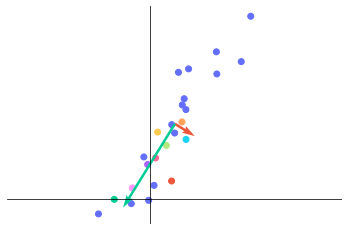

In [69]:
# generate 25 random points sampled from a correlated 2d Gaussian
np.random.seed(0)
n = 25
mean = [1, 3]
cov = [[1,   2], 
       [2,   3]]
x, y = np.random.multivariate_normal(mean, cov, n).T
data = np.vstack((x, y)).T

eigval, eigvec = np.linalg.eig(cov)
print(eigvec, "\n",eigval)
# eigvec = eigvec * eigval[..., None] 
# Normalizing eigenvectors for plotting
for i in range(len(eigval)):
    eigvec[:, i] = eigvec[:, i] / np.linalg.norm(eigvec[:, i]) * np.sqrt(np.abs(eigval[i])) * np.sign(eigval[i])

c = palette + [palette[0]]* (n - len(palette))
plt.scatter(data[:, 0], data[:, 1], c=c)
plt.quiver(mean[0], mean[1], eigvec[0, 0], eigvec[1, 0], color=palette[1], scale=7)
plt.quiver(mean[0], mean[1], eigvec[0, 1], eigvec[1, 1], color=palette[2], scale=7)
plt.axis('equal')
# remove box and axes
plt.axis('off')
# add spines
plt.axhline(0, color='black',linewidth=0.75)
plt.axvline(0, color='black',linewidth=0.75)

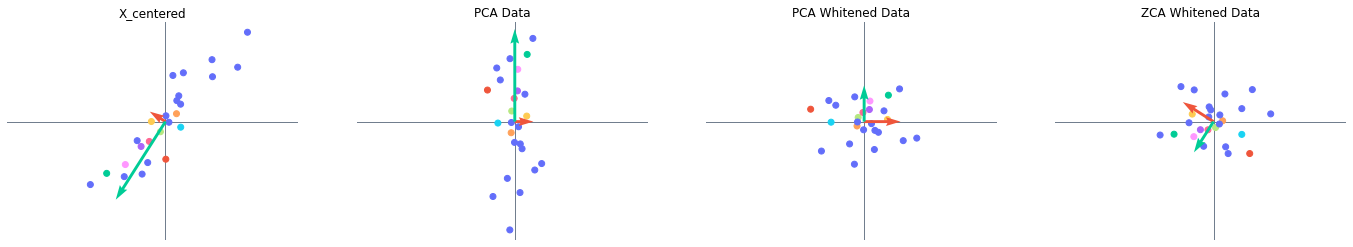

In [73]:
lw = 0.01
scale = 8
c = palette + [palette[0]]* (n - len(palette))
# c = palette[0]

# zero mean the data (Centering)
d_centered = data - np.mean(data, axis=0)
# compute the covariance matrix
cov = np.cov(d_centered.T)
# eigen decomposition
eig_vals, eig_vecs = np.linalg.eig(cov)
# Features in pca space
features = np.dot(d_centered, eig_vecs)
# PCA Whitened data
eps = 1e-5
lmd_t = np.diag((eig_vals+eps)**(-0.5))
w_pca = (lmd_t @ eig_vecs.T @ d_centered.T).T

# ZCA Whitened data
w_zca = (eig_vecs @ lmd_t @ eig_vecs.T @ d_centered.T).T

# normalize the data by its standard deviation
normed = d_centered / np.std(d_centered, axis=0)

# create subplots to plot hte original, centered, pca space, pca whitened data
fig, ax = plt.subplots(1, 4, figsize=(24, 4), sharex=True, sharey=True)

# Normalizing eigenvectors for plotting
ev1 = eig_vecs.copy()
for i in range(len(eigval)):
    ev1[:, i] = ev1[:, i] / np.linalg.norm(ev1[:, i]) * np.sqrt(np.abs(eig_vals[i])) * np.sign(eig_vals[i])
    
ax[0].set_title('X_centered')
ax[0].scatter(d_centered[:, 0], d_centered[:, 1],c=c)
ax[0].quiver(0,0, ev1[0, 0], ev1[1, 0], color=palette[1], scale=scale, width=lw)
ax[0].quiver(0,0, ev1[0, 1], ev1[1, 1], color=palette[2], scale=scale, width=lw)

ax[1].set_title('PCA Data')
ax[1].scatter(features[:, 0], features[:, 1],c=c)
ev2 = np.dot(ev1.T, eig_vecs).T
ax[1].quiver(0,0, ev2[0, 0], ev2[1, 0], color=palette[1], scale=scale, width=lw)
ax[1].quiver(0,0, ev2[0, 1], ev2[1, 1], color=palette[2], scale=scale, width=lw)

ax[2].set_title('PCA Whitened Data')
ax[2].scatter(w_pca[:, 0], w_pca[:, 1],c=c)
ev3 = (lmd_t @ ev2)
ax[2].quiver(0,0, ev3[0, 0], ev3[1, 0], color=palette[1], scale=scale, width=lw)
ax[2].quiver(0,0, ev3[0, 1], ev3[1, 1], color=palette[2], scale=scale, width=lw)

ax[3].set_title('ZCA Whitened Data')
ax[3].scatter(w_zca[:, 0], w_zca[:, 1],c=c)
ev4 = (eig_vecs @ ev3)
ax[3].quiver(0,0, ev4[0, 0], ev4[1, 0], color=palette[1], scale=scale, width=lw)
ax[3].quiver(0,0, ev4[0, 1], ev4[1, 1], color=palette[2], scale=scale, width=lw)

for a in ax:
    a.axhline(0, color='#717E8E', lw=1, zorder=0.1)
    a.axvline(0, color='#717E8E', lw=1, zorder=0.1)
    a.set_xlim(a.get_ylim())

    # remove box and axes
    a.axis('off')

plt.savefig('whitening.pdf', dpi=600, bbox_inches='tight')
# plt.tight_layout()

## Iternorm

In [71]:
"""
Reference:  Iterative Normalization: Beyond Standardization towards Efficient Whitening, CVPR 2019

- Paper:
- Code: https://github.com/huangleiBuaa/IterNorm
"""
import torch.nn
from torch.nn import Parameter

# import extension._bcnn as bcnn

__all__ = ['iterative_normalization', 'IterNorm']


# A wrapper class around the backbone to that adds an extra layer to it and exposes all atributes and methods of the backbone
class IterNormBackBoneWrapper(torch.nn.Module):
    def __init__(self, backbone):
        super().__init__()
        self.backbone = backbone
        self.iternorm = IterNorm(backbone.num_features)

    def forward(self, x):
        x = self.backbone(x)
        x = self.iternorm(x)
        return x

    @property
    def num_features(self):
        return self.backbone.num_features
    
    # def __getattr__(self, name):
    #     return getattr(self.backbone, name)

#
# class iterative_normalization(torch.autograd.Function):
#     @staticmethod
#     def forward(ctx, *inputs):
#         result = bcnn.iterative_normalization_forward(*inputs)
#         ctx.save_for_backward(*result[:-1])
#         return result[-1]
#
#     @staticmethod
#     def backward(ctx, *grad_outputs):
#         grad, = grad_outputs
#         grad_input = bcnn.iterative_normalization_backward(grad, ctx.saved_variables)
#         return grad_input, None, None, None, None, None, None, None


class iterative_normalization_py(torch.autograd.Function):
    @staticmethod
    def forward(ctx, *args, **kwargs):
        X, running_mean, running_wmat, nc, ctx.T, eps, momentum, training = args
        # change NxCxHxW to (G x D) x(NxHxW), i.e., g*d*m
        ctx.g = X.size(1) // nc
        x = X.transpose(0, 1).contiguous().view(ctx.g, nc, -1)
        _, d, m = x.size()
        saved = []
        if training:
            # calculate centered activation by subtracted mini-batch mean
            mean = x.mean(-1, keepdim=True)
            xc = x - mean
            saved.append(xc)
            # calculate covariance matrix
            P = [None] * (ctx.T + 1)
            P[0] = torch.eye(d).to(X).expand(ctx.g, d, d)
            Sigma = torch.baddbmm(eps, P[0], 1. / m, xc, xc.transpose(1, 2))
            # reciprocal of trace of Sigma: shape [g, 1, 1]
            rTr = (Sigma * P[0]).sum((1, 2), keepdim=True).reciprocal_()
            saved.append(rTr)
            Sigma_N = Sigma * rTr
            saved.append(Sigma_N)
            for k in range(ctx.T):
                P[k + 1] = torch.baddbmm(1.5, P[k], -0.5, torch.matrix_power(P[k], 3), Sigma_N)
            saved.extend(P)
            wm = P[ctx.T].mul_(rTr.sqrt())  # whiten matrix: the matrix inverse of Sigma, i.e., Sigma^{-1/2}
            running_mean.copy_(momentum * mean + (1. - momentum) * running_mean)
            running_wmat.copy_(momentum * wm + (1. - momentum) * running_wmat)
        else:
            xc = x - running_mean
            wm = running_wmat
        xn = wm.matmul(xc)
        Xn = xn.view(X.size(1), X.size(0), *X.size()[2:]).transpose(0, 1).contiguous()
        ctx.save_for_backward(*saved)
        return Xn

    @staticmethod
    def backward(ctx, *grad_outputs):
        grad, = grad_outputs
        saved = ctx.saved_variables
        xc = saved[0]  # centered input
        rTr = saved[1]  # trace of Sigma
        sn = saved[2].transpose(-2, -1)  # normalized Sigma
        P = saved[3:]  # middle result matrix,
        g, d, m = xc.size()

        g_ = grad.transpose(0, 1).contiguous().view_as(xc)
        g_wm = g_.matmul(xc.transpose(-2, -1))
        g_P = g_wm * rTr.sqrt()
        wm = P[ctx.T]
        g_sn = 0
        for k in range(ctx.T, 1, -1):
            P[k - 1].transpose_(-2, -1)
            P2 = P[k - 1].matmul(P[k - 1])
            g_sn += P2.matmul(P[k - 1]).matmul(g_P)
            g_tmp = g_P.matmul(sn)
            g_P.baddbmm_(1.5, -0.5, g_tmp, P2)
            g_P.baddbmm_(1, -0.5, P2, g_tmp)
            g_P.baddbmm_(1, -0.5, P[k - 1].matmul(g_tmp), P[k - 1])
        g_sn += g_P
        # g_sn = g_sn * rTr.sqrt()
        g_tr = ((-sn.matmul(g_sn) + g_wm.transpose(-2, -1).matmul(wm)) * P[0]).sum((1, 2), keepdim=True) * P[0]
        g_sigma = (g_sn + g_sn.transpose(-2, -1) + 2. * g_tr) * (-0.5 / m * rTr)
        # g_sigma = g_sigma + g_sigma.transpose(-2, -1)
        g_x = torch.baddbmm(wm.matmul(g_ - g_.mean(-1, keepdim=True)), g_sigma, xc)
        grad_input = g_x.view(grad.size(1), grad.size(0), *grad.size()[2:]).transpose(0, 1).contiguous()
        return grad_input, None, None, None, None, None, None, None


class IterNorm(torch.nn.Module):
    def __init__(self, num_features, num_groups=1, num_channels=None, T=5, dim=4, eps=1e-5, momentum=0.1, affine=True,
                 *args, **kwargs):
        super(IterNorm, self).__init__()
        # assert dim == 4, 'IterNorm is not support 2D'
        self.T = T
        self.eps = eps
        self.momentum = momentum
        self.num_features = num_features
        self.affine = affine
        self.dim = dim
        if num_channels is None:
            num_channels = (num_features - 1) // num_groups + 1
        num_groups = num_features // num_channels
        while num_features % num_channels != 0:
            num_channels //= 2
            num_groups = num_features // num_channels
        assert num_groups > 0 and num_features % num_groups == 0, "num features={}, num groups={}".format(num_features,
            num_groups)
        self.num_groups = num_groups
        self.num_channels = num_channels
        shape = [1] * dim
        shape[1] = self.num_features
        if self.affine:
            self.weight = Parameter(torch.Tensor(*shape))
            self.bias = Parameter(torch.Tensor(*shape))
        else:
            self.register_parameter('weight', None)
            self.register_parameter('bias', None)

        self.register_buffer('running_mean', torch.zeros(num_groups, num_channels, 1))
        # running whiten matrix
        self.register_buffer('running_wm', torch.eye(num_channels).expand(num_groups, num_channels, num_channels).clone())
        self.reset_parameters()

    def reset_parameters(self):
        # self.reset_running_stats()
        if self.affine:
            torch.nn.init.ones_(self.weight)
            torch.nn.init.zeros_(self.bias)

    def forward(self, X: torch.Tensor):
        X_hat = iterative_normalization_py.apply(X, self.running_mean, self.running_wm, self.num_channels, self.T,
                                                 self.eps, self.momentum, self.training)
        # affine
        if self.affine:
            return X_hat * self.weight + self.bias
        else:
            return X_hat

    def extra_repr(self):
        return '{num_features}, num_channels={num_channels}, T={T}, eps={eps}, ' \
               'momentum={momentum}, affine={affine}'.format(**self.__dict__)

In [72]:
ItN = IterNorm(64, num_groups=8, T=10, momentum=1, affine=False)
print(ItN)
ItN.train()
#x = torch.randn(32, 64, 14, 14)
x = torch.randn(128, 64)
x.requires_grad_()
y = ItN(x)
z = y.transpose(0, 1).contiguous().view(x.size(1), -1)
print(z.matmul(z.t()) / z.size(1))

y.sum().backward()
print('x grad', x.grad.size())

ItN.eval()
y = ItN(x)
z = y.transpose(0, 1).contiguous().view(x.size(1), -1)
print(z.matmul(z.t()) / z.size(1))

IterNorm(64, num_channels=8, T=10, eps=1e-05, momentum=1, affine=False)
tensor([[ 9.9999e-01,  7.8556e-07, -4.3565e-07,  ...,  1.1553e-01,
         -8.5275e-03,  1.0159e-01],
        [ 7.8556e-07,  9.9999e-01, -3.8678e-07,  ...,  1.9275e-02,
          3.8102e-02, -7.5649e-02],
        [-4.3565e-07, -3.8678e-07,  9.9999e-01,  ..., -4.4938e-02,
         -1.0736e-01,  1.1400e-02],
        ...,
        [ 1.1553e-01,  1.9275e-02, -4.4938e-02,  ...,  9.9999e-01,
         -1.6817e-07,  1.5840e-06],
        [-8.5275e-03,  3.8102e-02, -1.0736e-01,  ..., -1.6817e-07,
          9.9999e-01, -1.7159e-06],
        [ 1.0159e-01, -7.5649e-02,  1.1400e-02,  ...,  1.5840e-06,
         -1.7159e-06,  9.9999e-01]], grad_fn=<DivBackward0>)
x grad torch.Size([128, 64])
tensor([[ 9.9999e-01,  7.8556e-07, -4.3565e-07,  ...,  1.1553e-01,
         -8.5275e-03,  1.0159e-01],
        [ 7.8556e-07,  9.9999e-01, -3.8678e-07,  ...,  1.9275e-02,
          3.8102e-02, -7.5649e-02],
        [-4.3565e-07, -3.8678e-07,  9

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning: 'saved_variables' is deprecated; use 'saved_tensors'
